In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,cross_val_predict, KFold, StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import confusion_matrix, classification_report, make_scorer, precision_score,recall_score, precision_recall_curve, f1_score, roc_curve, accuracy_score, roc_auc_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

import seaborn as sns

In [14]:
from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
import pickle
with open("df_bank.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [16]:
df.head()

,age,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,poutcome_nonexistent,poutcome_success,pdays_999,pdays_0_4,pdays_5_9,pdays_10_14,pdays_15_19,pdays_20_22,pdays_25_27,y
0,56,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,57,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,37,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,40,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,56,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


## 1. Baseline Models

In [87]:
features=list(df.columns.values)
features.remove('y')

X = df[features]
Y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)

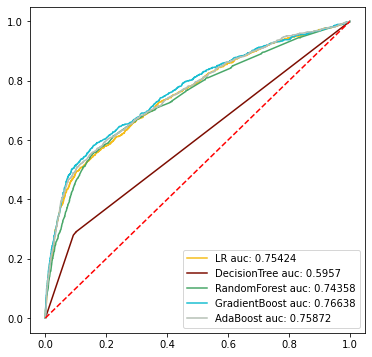

In [88]:
models=[(LogisticRegression(), 'LR'), (DecisionTreeClassifier(),'DecisionTree'),
        (RandomForestClassifier(),'RandomForest'),
        (GradientBoostingClassifier(),'GradientBoost'),(AdaBoostClassifier(),'AdaBoost')]

plt.figure(figsize=(6,6))
for model, model_label in models:
    if model_label == 'LR':
        scaler = StandardScaler()
        scaled_xtrain = scaler.fit_transform(X_train)
        scaled_xtest = scaler.transform(X_test)

        model.fit(scaled_xtrain, y_train)
        y_predict = model.predict_proba(scaled_xtest)[:,1]
        fpr, tpr, threshold = roc_curve(y_test, y_predict)
        auc = roc_auc_score(y_test, y_predict)
        c = (np.random.rand(), np.random.rand(), np.random.rand())
        plt.plot(fpr, tpr, color=c, label=model_label+ ' '+ 'auc: '+ str(round(auc,5)))
    else:
        model.fit(X_train, y_train)
        y_predict = model.predict_proba(X_test)[:,1]
        fpr, tpr, threshold = roc_curve(y_test, y_predict)
        auc = roc_auc_score(y_test, y_predict)
        c = (np.random.rand(), np.random.rand(), np.random.rand())
        plt.plot(fpr, tpr, color=c, label=model_label+ ' '+ 'auc: '+ str(round(auc,5)))


plt.plot([0,1],[0,1],'r--')
plt.legend()

In [32]:
models=[(LogisticRegression(), 'LR'),
        (DecisionTreeClassifier(),'DecisionTree'),(RandomForestClassifier(),'RandomForest'),
        (GradientBoostingClassifier(),'GradientBoost'),(AdaBoostClassifier(),'AdaBoost')]

#kf = KFold(n_splits=5, shuffle=True, random_state = 123)

for model, model_label in models:
    if model_label == 'LR':
        scaler = StandardScaler()
        scaled_xtrain = scaler.fit_transform(X_train)
        scaled_xtest = scaler.transform(X_test)
        model.fit(scaled_xtrain, y_train)
        
        y_predict_proba = model.predict_proba(scaled_xtest)[:,1]
        auc = roc_auc_score(y_test, y_predict_proba)
        y_predict = model.predict(scaled_xtest)
    
    else:
        model.fit(X_train, y_train)
        y_predict = model.predict_proba(X_test)[:,1]
        fpr, tpr, threshold = roc_curve(y_test, y_predict)
        auc = roc_auc_score(y_test, y_predict)
        
        y_predict_proba = model.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_predict_proba)
        y_predict = model.predict(X_test)
  

    print(model_label, 'auc:', auc)
    print('classification_report:\n',classification_report(y_test,y_predict))
    

LR auc: 0.7542439206535823
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      7328
           1       0.62      0.17      0.26       910

    accuracy                           0.90      8238
   macro avg       0.76      0.58      0.60      8238
weighted avg       0.87      0.90      0.87      8238

DecisionTree auc: 0.6035386624838044
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7328
           1       0.28      0.29      0.29       910

    accuracy                           0.84      8238
   macro avg       0.60      0.60      0.60      8238
weighted avg       0.84      0.84      0.84      8238

RandomForest auc: 0.7348930340947263
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7328
           1       0.49      0.22      0.31       910

    accur

## 2. Adjust balance between 2 outcomes

In [34]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


sm = SMOTE(random_state = 4)
X_train_res, y_train_res= sm.fit_sample(X_train, y_train)

In [35]:
y_train_res.value_counts()

1    29220
0    29220
Name: y, dtype: int64

In [36]:
models=[(LogisticRegression(), 'LR'),
        (DecisionTreeClassifier(),'DecisionTree'),(RandomForestClassifier(),'RandomForest'),
        (GradientBoostingClassifier(),'GradientBoost'),(AdaBoostClassifier(),'AdaBoost')]

for model, model_label in models:
    if model_label == 'LR':
        scaler = StandardScaler()
        scaled_xtrain = scaler.fit_transform(X_train_res)
        scaled_xtest = scaler.transform(X_test)
        model.fit(scaled_xtrain, y_train_res)
        
        y_predict_proba = model.predict_proba(scaled_xtest)[:,1]
        auc = roc_auc_score(y_test, y_predict_proba)
        y_predict = model.predict(scaled_xtest)
    
    else:
        model.fit(X_train_res, y_train_res)
        y_predict = model.predict_proba(X_test)[:,1]
        fpr, tpr, threshold = roc_curve(y_test, y_predict)
        auc = roc_auc_score(y_test, y_predict)
        
        y_predict_proba = model.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_predict_proba)
        y_predict = model.predict(X_test)
  

    print(model_label, 'auc:', auc)
    print('classification_report:\n',classification_report(y_test,y_predict))

LR auc: 0.7533893031095542
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      7328
           1       0.61      0.18      0.28       910

    accuracy                           0.90      8238
   macro avg       0.76      0.58      0.61      8238
weighted avg       0.87      0.90      0.87      8238

DecisionTree auc: 0.6044493647727818
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7328
           1       0.27      0.30      0.28       910

    accuracy                           0.83      8238
   macro avg       0.59      0.60      0.59      8238
weighted avg       0.84      0.83      0.84      8238

RandomForest auc: 0.747501229665531
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      7328
           1       0.44      0.31      0.36       910

    accura

We trained models on balanced train set and test on test set -- increase in recall. auc remains similiar, accuracy decreases slightly.

## 3. Add Features: Social and Economic Attributes

In [37]:
with open("df_econ.pkl", 'rb') as picklefile: 
    df_econ = pickle.load(picklefile)

In [38]:
df_econ.head()

,age,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,pdays_10_14,pdays_15_19,pdays_20_22,pdays_25_27,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [48]:
features=list(df_econ.columns.values)
features.remove('y')

X = df_econ[features]
Y = df_econ['y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)

In [40]:
#oversample = SMOTE(sampling_strategy=0.3)
#X_over, Y_over = oversample.fit_resample(X_train, y_train)
#undersample = RandomUnderSampler(sampling_strategy=0.3)
#X_rs, Y_rs = undersample.fit_resample(X_over, Y_over)
sm = SMOTE(random_state = 4)
X_train_res, y_train_res= sm.fit_sample(X_train, y_train)

In [41]:
models=[(LogisticRegression(), 'LR'),
        (DecisionTreeClassifier(),'DecisionTree'),(RandomForestClassifier(),'RandomForest'),
        (GradientBoostingClassifier(),'GradientBoost'),(AdaBoostClassifier(),'AdaBoost')]

for model, model_label in models:
    if model_label == 'LR':
        scaler = StandardScaler()
        scaled_xtrain = scaler.fit_transform(X_train_res)
        scaled_xtest = scaler.transform(X_test)
        model.fit(scaled_xtrain, y_train_res)
        
        y_predict_proba = model.predict_proba(scaled_xtest)[:,1]
        auc = roc_auc_score(y_test, y_predict_proba)
        y_predict = model.predict(scaled_xtest)
    
    else:
        model.fit(X_train_res, y_train_res)
        y_predict = model.predict_proba(X_test)[:,1]
        fpr, tpr, threshold = roc_curve(y_test, y_predict)
        auc = roc_auc_score(y_test, y_predict)
        
        y_predict_proba = model.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_predict_proba)
        y_predict = model.predict(X_test)
    
    print(model_label, ':', auc)
    print('classification_report:\n',classification_report(y_test,y_predict))
    

LR : 0.7853962972071598
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7328
           1       0.60      0.22      0.32       910

    accuracy                           0.90      8238
   macro avg       0.76      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238

DecisionTree : 0.6268648927491722
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7328
           1       0.30      0.35      0.32       910

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.62      8238
weighted avg       0.85      0.84      0.84      8238

RandomForest : 0.7705033980757234
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      7328
           1       0.49      0.35      0.41       910

    accuracy      

##### We see increases in auc scores and recall ---- new features are helpful

## 4. Parameter Tuning with validation

### 1. Logistic

In [44]:
log_pipe = imbPipeline([
    ("smote", SMOTE()),
    ("standardscaler", StandardScaler()),
    ("logisticregression", LogisticRegression())
])

log_param = {'logisticregression__penalty':['l1', 'l2'],
             'logisticregression__C':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100, 1000]}

kf = StratifiedKFold(n_splits=5, random_state = 89)

#scoring=['roc_auc', 'recall', 'f1','accuracy']

#scorers = {
#    'precision_score': make_scorer(precision_score),
#    'recall_score': make_scorer(recall_score),
#    'accuracy_score': make_scorer(accuracy_score)}
#log_grid = GridSearchCV(log_pipe, log_param, cv=kf, scoring=scorers, refit='recall_score')
log_grid = GridSearchCV(log_pipe, log_param, cv=kf, scoring='recall')
log_grid.fit(X_train, y_train)

log_grid.best_params_

{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'}

In [278]:
#log_grid.cv_results_

In [54]:
pipeline =imbPipeline([
        ("smote", SMOTE()),
        ("standardscaler", StandardScaler()),
        ( "LR", LogisticRegression(C=0.001, penalty='l2'))
    ])
kf = StratifiedKFold(n_splits=5, random_state = 89)
scoring = ['accuracy','roc_auc','f1','precision','recall']
scores = cross_validate(pipeline, X_train, y_train, cv=kf, scoring=scoring)
print('LR', 'Accuracy:', scores['test_accuracy'].mean())
print('LR','AUC:', scores['test_roc_auc'].mean())
print('LR','Precision', scores['test_precision'].mean())
print('LR', 'Recall', scores['test_recall'].mean())
print('LR', 'F1', scores['test_f1'].mean())

LR Accuracy: 0.8937784522003035
LR AUC: 0.7861530260407779
LR Precision 0.5512740537737773
LR Recall 0.33136729222520106
LR F1 0.4138402350349019


### 2. DecisionTree

In [59]:
def model_print_scores(model_label, model):
    pipeline =imbPipeline([("smote", SMOTE()),( model_label, model)])
    kf = StratifiedKFold(n_splits=5, random_state = 89)
    scoring = ['accuracy','roc_auc','f1','precision','recall']
    scores = cross_validate(pipeline, X_train, y_train, cv=kf, scoring=scoring)
    print(model_label, 'Accuracy:', scores['test_accuracy'].mean())
    print(model_label, 'AUC:', scores['test_roc_auc'].mean())
    print(model_label, 'Precision', scores['test_precision'].mean())
    print(model_label, 'Recall', scores['test_recall'].mean())
    print(model_label, 'F1', scores['test_f1'].mean())

In [60]:
dt_pipe = imbPipeline([("smote", SMOTE()), ("decisiontreeclassifier", DecisionTreeClassifier())])
dt_params={'decisiontreeclassifier__min_samples_split': [10,25,50,100,150,200,300,400,500,600,800,1000,1200,1500,2000],
           'decisiontreeclassifier__min_samples_leaf':[1, 2, 5, 10,20,50,100,200]}

kf = StratifiedKFold(n_splits=5, random_state = 89)

dt_grid = GridSearchCV(dt_pipe, dt_params, cv=kf, scoring='recall')
dt_grid.fit(X_train, y_train)

dt_grid.best_params_

{'decisiontreeclassifier__min_samples_leaf': 20,
 'decisiontreeclassifier__min_samples_split': 2000}

In [61]:
model_print_scores("decisiontree", DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=2000))

decisiontree Accuracy: 0.8552959028831563
decisiontree AUC: 0.7697546623286777
decisiontree Precision 0.40382568681307607
decisiontree Recall 0.5474530831099196
decisiontree F1 0.46298536944928126


### 3. RandomForest

In [62]:
rf_pipe = imbPipeline([("smote", SMOTE()), ("randomforestclassifier", RandomForestClassifier())])

rf_params={'randomforestclassifier__n_estimators' : [100,500,300,1000],
           'randomforestclassifier__max_features' : ['sqrt', 'none', 'log2'],
          'randomforestclassifier__min_samples_leaf' : [2, 10, 25, 50,75,100,125,150]}

kf = StratifiedKFold(n_splits=5, random_state = 89)

rf_grid = GridSearchCV(rf_pipe, rf_params, cv=kf, scoring='recall',n_jobs=-1)
rf_grid.fit(X_train, y_train)

rf_grid.best_params_

{'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__min_samples_leaf': 150,
 'randomforestclassifier__n_estimators': 100}

In [63]:
model_print_scores("RF", RandomForestClassifier(max_features='log2',min_samples_leaf=150, n_estimators=100))

RF Accuracy: 0.8572078907435507
RF AUC: 0.7884776989942252
RF Precision 0.41023092613081724
RF Recall 0.5967828418230564
RF F1 0.4861797336102354


### 4. GradientBoostingClassifier()

In [64]:
gb_pipe = imbPipeline([("smote", SMOTE()), ("gradientboostingclassifier", GradientBoostingClassifier())])

gb_params = {'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
             'gradientboostingclassifier__n_estimators':range(20,151,10)}

kf = StratifiedKFold(n_splits=5, random_state = 89)

gb_grid = GridSearchCV(gb_pipe, gb_params, cv=kf, scoring='recall')
gb_grid.fit(X_train, y_train)

gb_grid.best_params_

{'gradientboostingclassifier__learning_rate': 0.05,
 'gradientboostingclassifier__n_estimators': 20}

In [65]:
model_print_scores("GB", GradientBoostingClassifier(learning_rate=0.05,n_estimators=20))

GB Accuracy: 0.8546282245827012
GB AUC: 0.7820333588401202
GB Precision 0.40233290515936365
GB Recall 0.5828418230563003
GB F1 0.47579436278278103


In [66]:
gb_pipe2 = imbPipeline([("smote", SMOTE()), ("gradientboostingclassifier", GradientBoostingClassifier(learning_rate=0.05,n_estimators=20))])

gb_params2 = {'gradientboostingclassifier__max_depth':range(5,16,2), 
              'gradientboostingclassifier__min_samples_split':range(200,1001,200)}

gb_grid2 = GridSearchCV(gb_pipe2, gb_params2, cv=kf, scoring='recall')
gb_grid2.fit(X_train, y_train)

gb_grid2.best_params_

{'gradientboostingclassifier__max_depth': 5,
 'gradientboostingclassifier__min_samples_split': 1000}

In [67]:
model_print_scores("GB", GradientBoostingClassifier(learning_rate=0.05,n_estimators=20,max_depth=5,min_samples_split= 1000))

GB Accuracy: 0.8697723823975722
GB AUC: 0.7861322444320886
GB Precision 0.4400644085194479
GB Recall 0.5506702412868633
GB F1 0.4888646776441255


### 5. AdaBoostClassifier()

In [68]:
ada_pipe = imbPipeline([("smote", SMOTE()), ("adaboostclassifier", AdaBoostClassifier())])

ada_params = {'adaboostclassifier__n_estimators': [25,50,75,100,150,200,300,400],
              'adaboostclassifier__learning_rate': [0.0001, 0.001,0.01, 0.05, 0.1, 0.5, 1]}

kf = StratifiedKFold(n_splits=5, random_state = 89)

ada_grid = GridSearchCV(ada_pipe, ada_params, cv=kf, scoring='recall')
ada_grid.fit(X_train, y_train)

ada_grid.best_params_

{'adaboostclassifier__learning_rate': 0.05,
 'adaboostclassifier__n_estimators': 25}

In [69]:
model_print_scores("Ada", AdaBoostClassifier(learning_rate=0.05,n_estimators=25))

Ada Accuracy: 0.7520789074355084
Ada AUC: 0.7710687435430211
Ada Precision 0.2692055449516958
Ada Recall 0.6916890080428955
Ada F1 0.38741218376359343


#### AdaBoost gives the best recall, with RandomForest as the second best. Their auc scores are very similar, but Ada has lower accuracy, precision and F1 scores (since it predicts many 0 as 1, high false positive). 

##### Depends on the marketing budget, if the bank is eager to seize all positive subscriber, we'll go with AdaBoost. If the budget is limited, we can go with RandomForest.

## 4. Recall Threshold

divide train set to have train and validation

In [72]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=40)

In [73]:
sm = SMOTE(random_state = 8)
X_train_res, y_train_res= sm.fit_sample(X_train2, y_train2)

#### RandomForest

AUC 0.7955953902257977
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      5826
           1       0.40      0.60      0.48       764

    accuracy                           0.85      6590
   macro avg       0.67      0.74      0.70      6590
weighted avg       0.88      0.85      0.86      6590



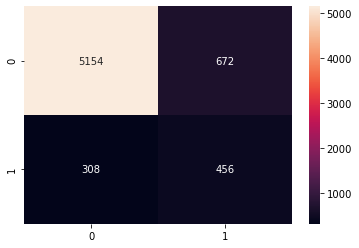

In [74]:
rf_model=RandomForestClassifier(max_features='log2',min_samples_leaf=150, n_estimators=100)
rf_model.fit(X_train_res, y_train_res)

y_predict_proba = rf_model.predict_proba(X_val)[:,1]
y_predict = rf_model.predict(X_val)
auc = roc_auc_score(y_val, y_predict_proba)
    
print('AUC', auc)
print('classification_report:\n',classification_report(y_val,y_predict))
sns.heatmap(confusion_matrix(y_val, y_predict),annot=True,fmt='d')
plt.show()

Best Threshold=0.579565, F-Score=0.494
recall:0.5654450261780105


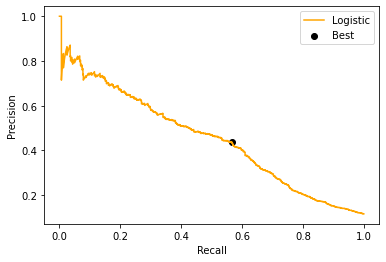

In [76]:
yhat = rf_model.predict_proba(X_val)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_val, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
print(f'recall:{recall[ix]}' )
# plot the roc curve for the model
plt.plot(recall, precision, color='orange', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Ada

0.7819095613992519
classification_report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      5826
           1       0.28      0.70      0.40       764

    accuracy                           0.76      6590
   macro avg       0.62      0.73      0.63      6590
weighted avg       0.87      0.76      0.80      6590



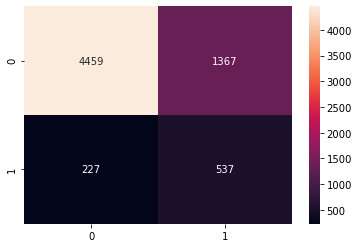

In [77]:
ada_model=AdaBoostClassifier(learning_rate=0.05,n_estimators=25)
ada_model.fit(X_train_res, y_train_res)
    
y_predict_proba = ada_model.predict_proba(X_val)[:,1]
y_predict = ada_model.predict(X_val)
auc = roc_auc_score(y_val, y_predict_proba)
    
print(auc)
print('classification_report:\n',classification_report(y_val,y_predict))
sns.heatmap(confusion_matrix(y_val, y_predict),annot=True,fmt='d')
plt.show()

Best Threshold=0.685094, F-Score=0.469
recall:0.49607329842931935


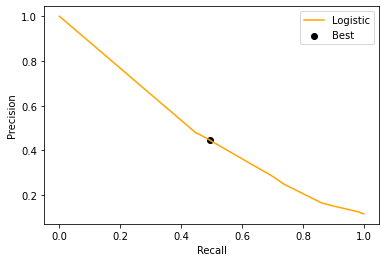

In [78]:
yhat = ada_model.predict_proba(X_val)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_val, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
print(f'recall:{recall[ix]}' )
# plot the roc curve for the model
plt.plot(recall, precision, color='orange', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [ ]:
clf = sklearn.ensemble.RandomForestClassifier()
model = fit(X,y) # fit model to training datset
probs = model.predict_proba(X_new) # prediction on a new dataset X_new

threshold = 0.7 # threshold we set where the probability prediction must be above this to be classified as a '1'
classes = probs[:,1] # say it is the class in the second column you care about predictint
classes[classes>=threshold] = 1
classes[classes<threshold] = 0

#### To be honest, we don't need adjust threshold since f1 in our current result is already close enough to the best f1 score, but we don't want to scarifice too much recall.

## 5. Pick the final model and read .feature_importances

final model: fit on train test on test

In [79]:
sm = SMOTE(random_state = 12)
X_train_res, y_train_res= sm.fit_sample(X_train, y_train)

AUC 0.782694407121263
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      7328
           1       0.41      0.58      0.48       910

    accuracy                           0.86      8238
   macro avg       0.68      0.74      0.70      8238
weighted avg       0.89      0.86      0.87      8238



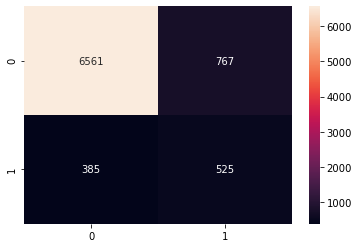

In [81]:
rf_model=RandomForestClassifier(max_features='log2',min_samples_leaf=150, n_estimators=100)
rf_model.fit(X_train_res, y_train_res)
    
y_predict_proba = rf_model.predict_proba(X_test)[:,1]
y_predict = rf_model.predict(X_test)
auc = roc_auc_score(y_test, y_predict_proba)
    
print('AUC', auc)
print('classification_report:\n',classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,fmt='d')
plt.show()

AUC 0.7645401200873363
classification_report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      7328
           1       0.27      0.67      0.38       910

    accuracy                           0.76      8238
   macro avg       0.61      0.72      0.61      8238
weighted avg       0.87      0.76      0.80      8238



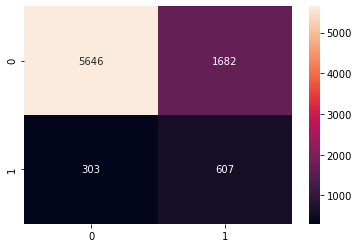

In [82]:
ada_model=ada_model=AdaBoostClassifier(learning_rate=0.05,n_estimators=25)
ada_model.fit(X_train_res, y_train_res)
    
y_predict_proba = ada_model.predict_proba(X_test)[:,1]
y_predict = ada_model.predict(X_test)
auc = roc_auc_score(y_test, y_predict_proba)
    
print('AUC', auc)
print('classification_report:\n',classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,fmt='d')
plt.show()

We can see here AdaBoost has 1682 false positive vs 767 in RF. 
Depends on the marketing budget, if the bank is eager to seize all positive subscriber, we'll go with AdaBoost. If the budget is limited, we can go with RandomForest.

In [84]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][:20], y=fi_df['feature_names'][:20])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

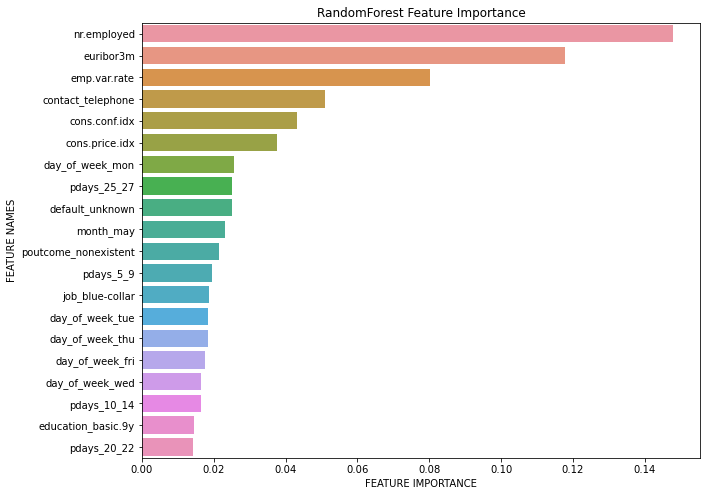

In [85]:
plot_feature_importance(rf_model.feature_importances_,X_train.columns,'RandomForest')

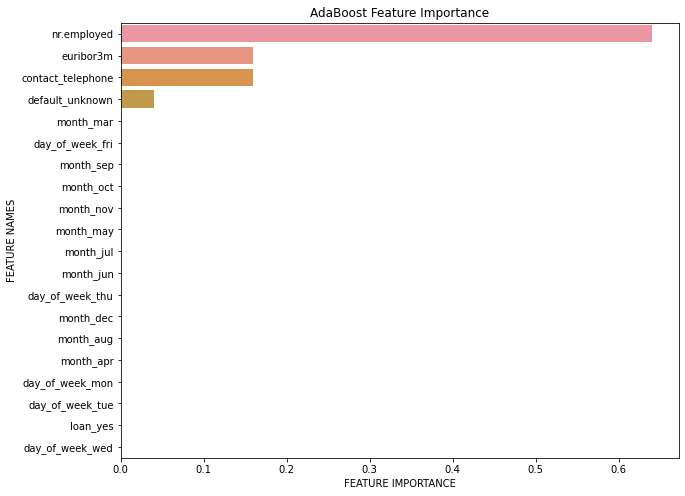

In [86]:
plot_feature_importance(ada_model.feature_importances_,X_train.columns,'AdaBoost')